**Business Analytics**

Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ 
##Question
You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. 






In [21]:
#Import all required libraries for easy to understand
import pandas as pd
import numpy as np
#import the python libraries matplotlib and seaborn libraries is used for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.__version__
!pip install pandas==0.25

In [22]:
Super_store = pd.read_csv("/content/SampleSuperstore.csv")

In [23]:
Super_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [24]:
Super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [25]:
Super_store.shape

(9994, 13)

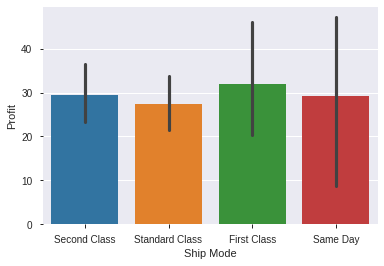

In [26]:
sns.barplot(x='Ship Mode',y='Profit',data=Super_store)

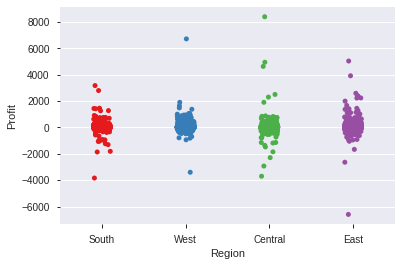

In [27]:
sns.stripplot(x="Region", y="Profit", data=Super_store,jitter=True,palette='Set1',split=True)

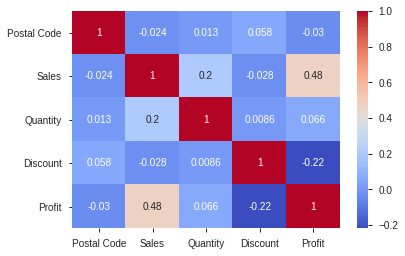

In [28]:
sns.heatmap(Super_store.corr(),cmap='coolwarm',annot=True)

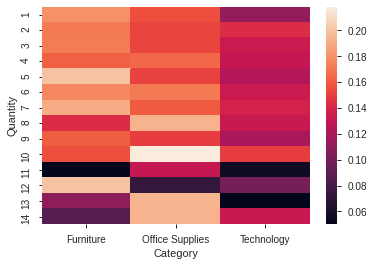

In [29]:
pvstore = Super_store.pivot_table(values='Discount',index='Quantity',columns='Category')
sns.heatmap(pvstore)

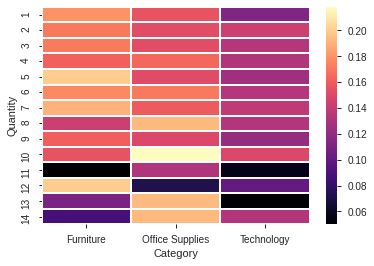

In [30]:
sns.heatmap(pvstore,cmap='magma',linecolor='white',linewidths=1)

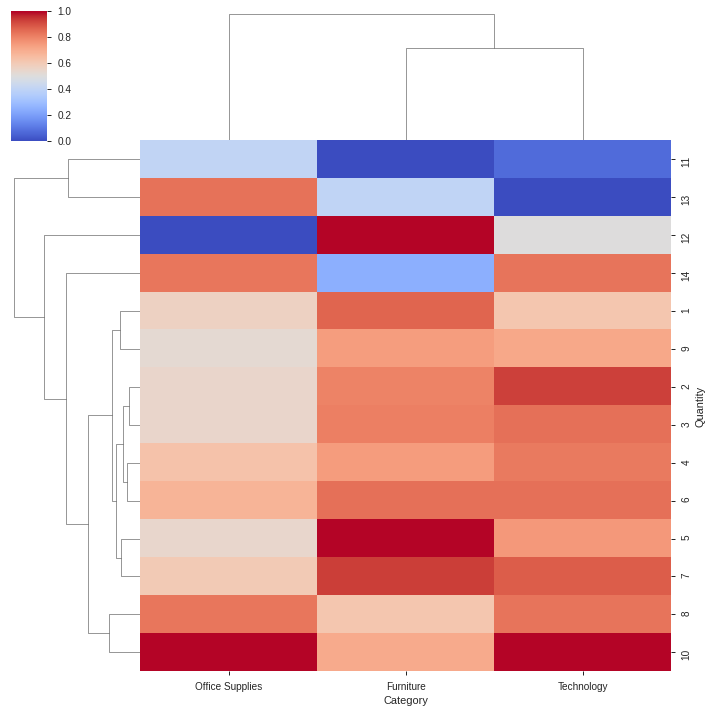

In [31]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvstore,cmap='coolwarm',standard_scale=1)

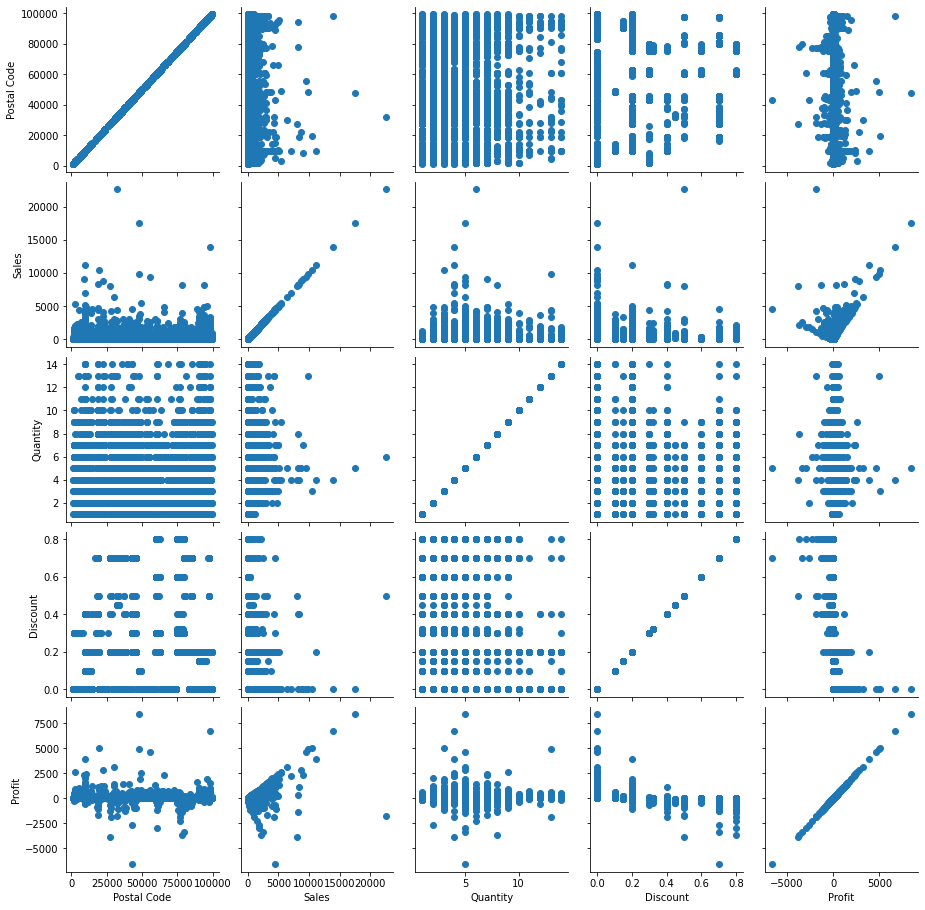

In [138]:
# Then you map to the grid
g = sns.PairGrid(Super_store)
g.map(plt.scatter)

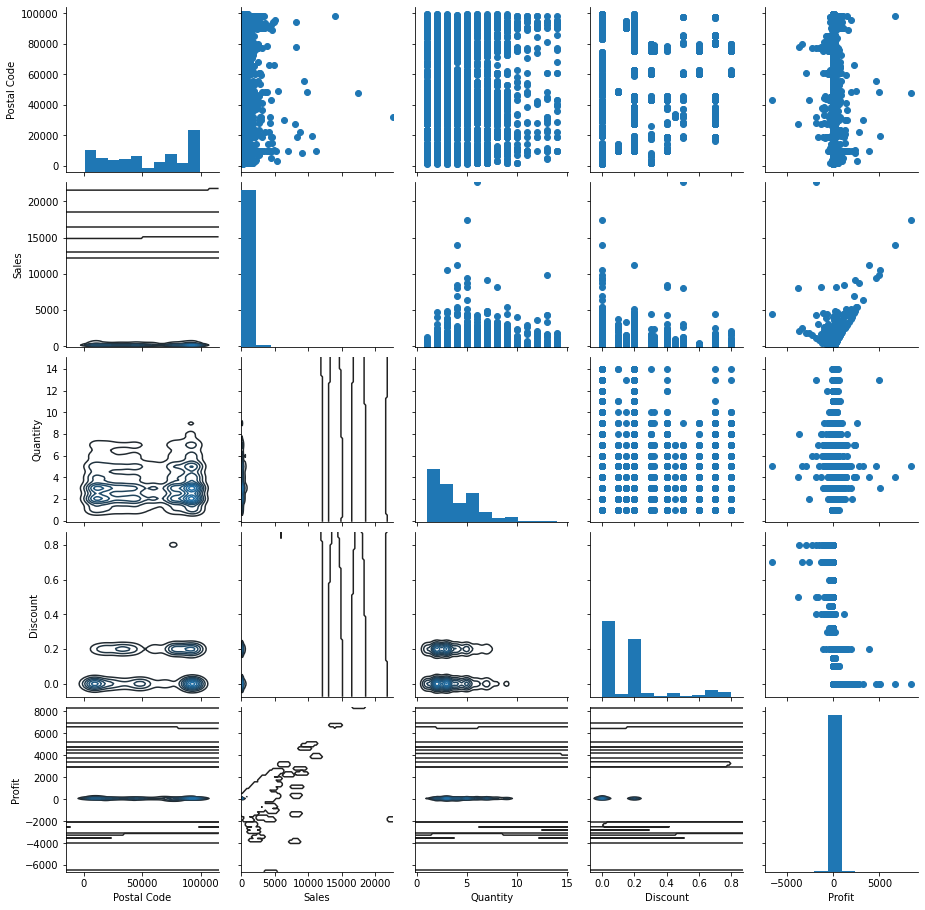

In [16]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(Super_store)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

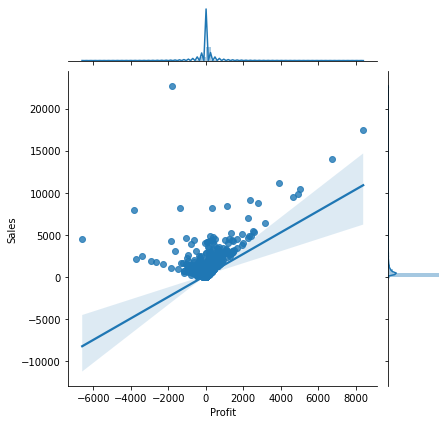

In [13]:
g = sns.JointGrid(x="Profit", y="Sales", data=Super_store)
g = g.plot(sns.regplot, sns.distplot)

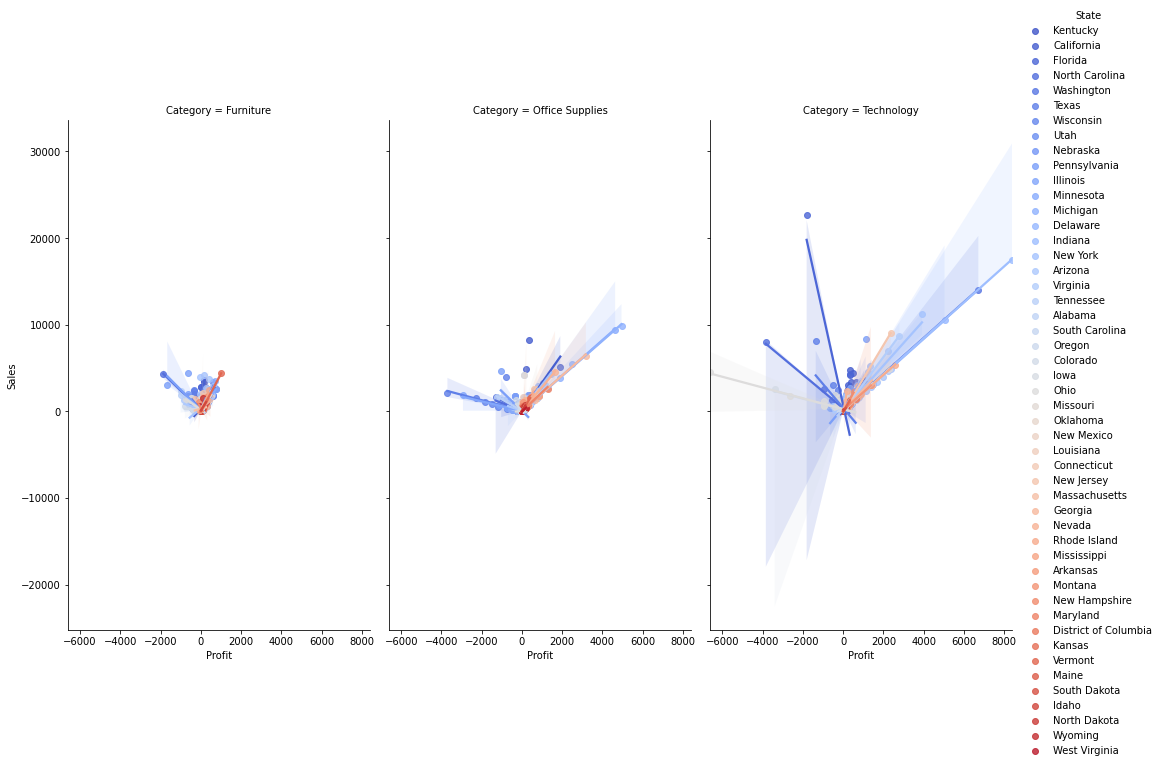

In [14]:
sns.lmplot(x='Profit',y='Sales',data=Super_store,col='Category',hue='State',palette='coolwarm',aspect=0.6,size=8)

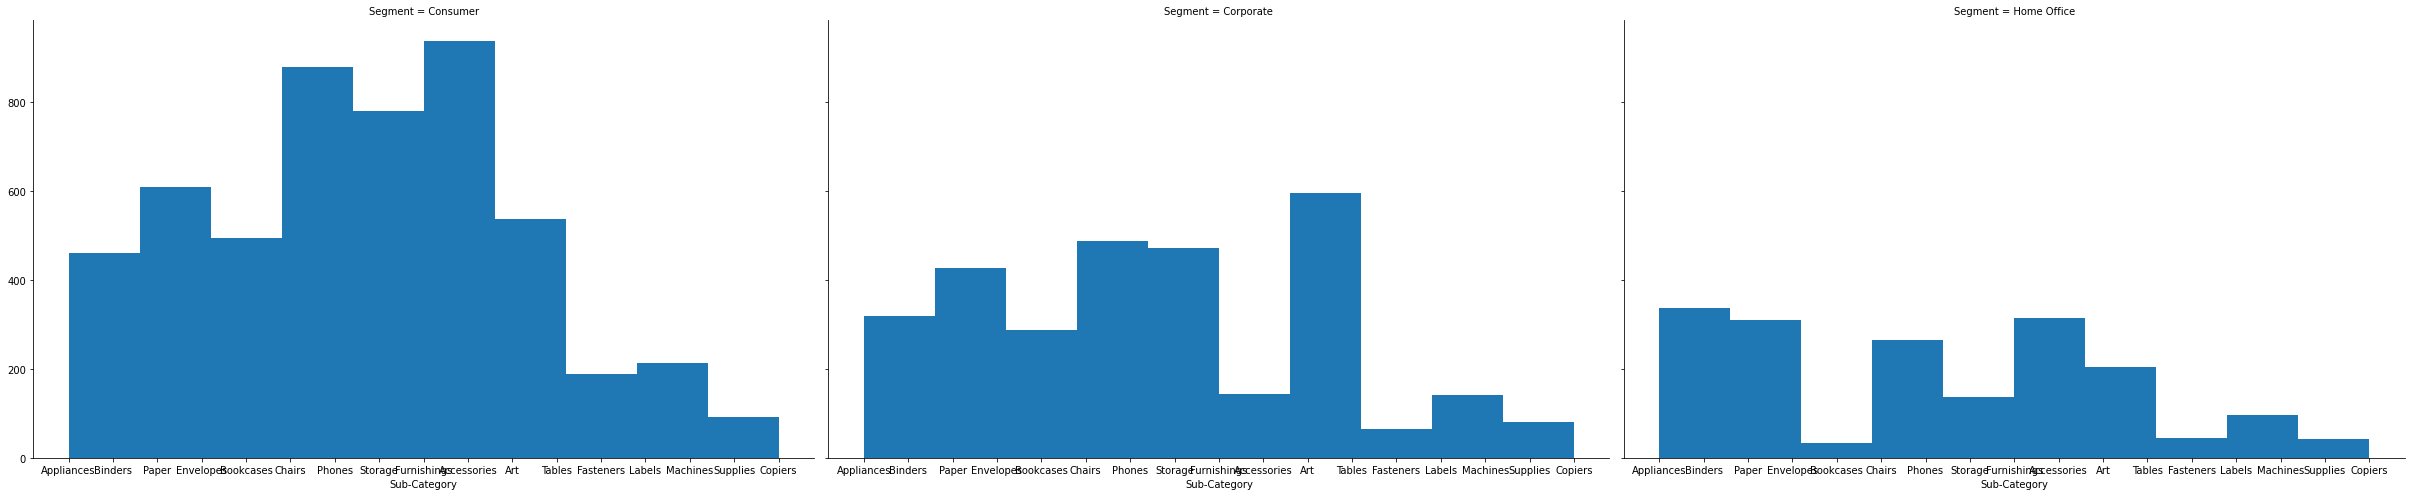

In [15]:
g = sns.FacetGrid(data=Super_store,col='Segment',aspect=1.6,size=7)
g.map(plt.hist,'Sub-Category')

In [32]:
Info_store = pd.DataFrame(index = Super_store.columns)

Info_store['dtype'] = Super_store.dtypes 
Info_store['count'] = Super_store.nunique()
Info_store


,dtype,count
Ship Mode,object,4
Segment,object,3
Country,object,1
City,object,531
State,object,49
Postal Code,int64,631
Region,object,4
Category,object,3
Sub-Category,object,17
Sales,float64,5825


In [33]:
from pandas_profiling import ProfileReport

In [34]:

ProfileReport(Super_store)


Number of variables,13
Number of observations,9994
Total Missing (%),0.0%
Total size in memory,1015.1 KiB
Average record size in memory,104.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,1


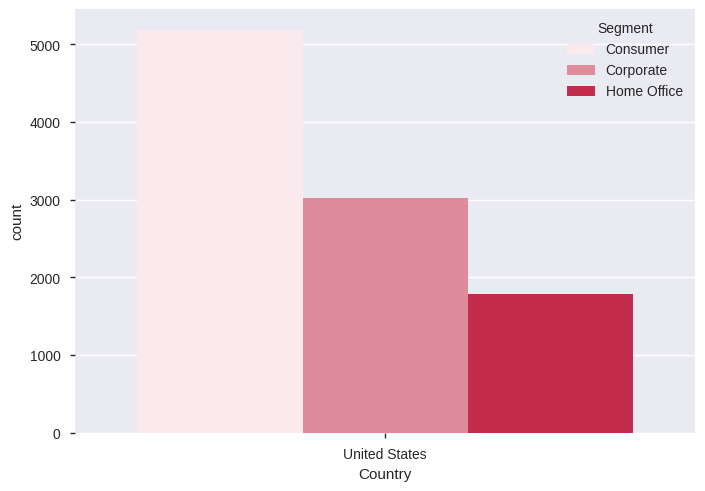

In [35]:
sns.countplot(x= Super_store['Country'], hue = Super_store.Segment,color='crimson')

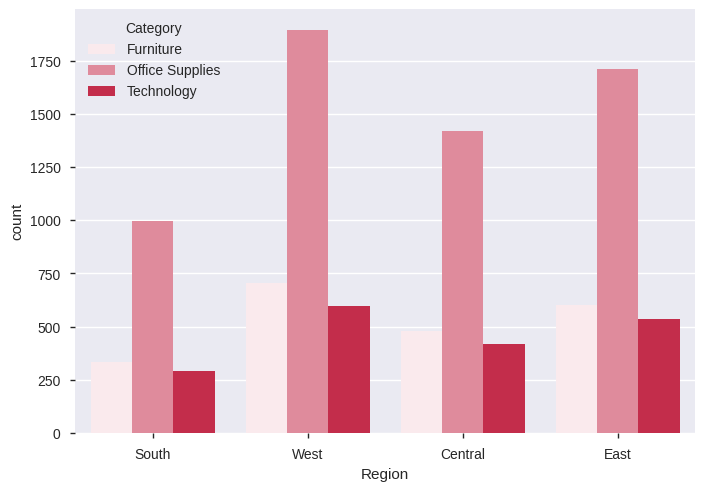

In [36]:
sns.countplot(x= Super_store.Region, hue = Super_store.Category,color='crimson')

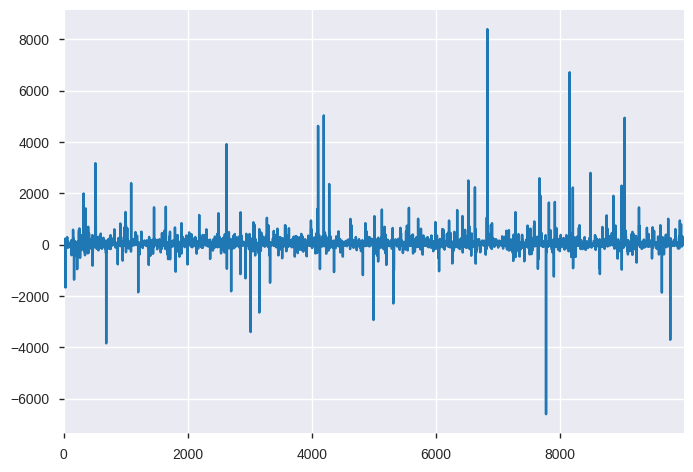

In [37]:
Super_store.Profit.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fa08a3978>,
      dtype=object)

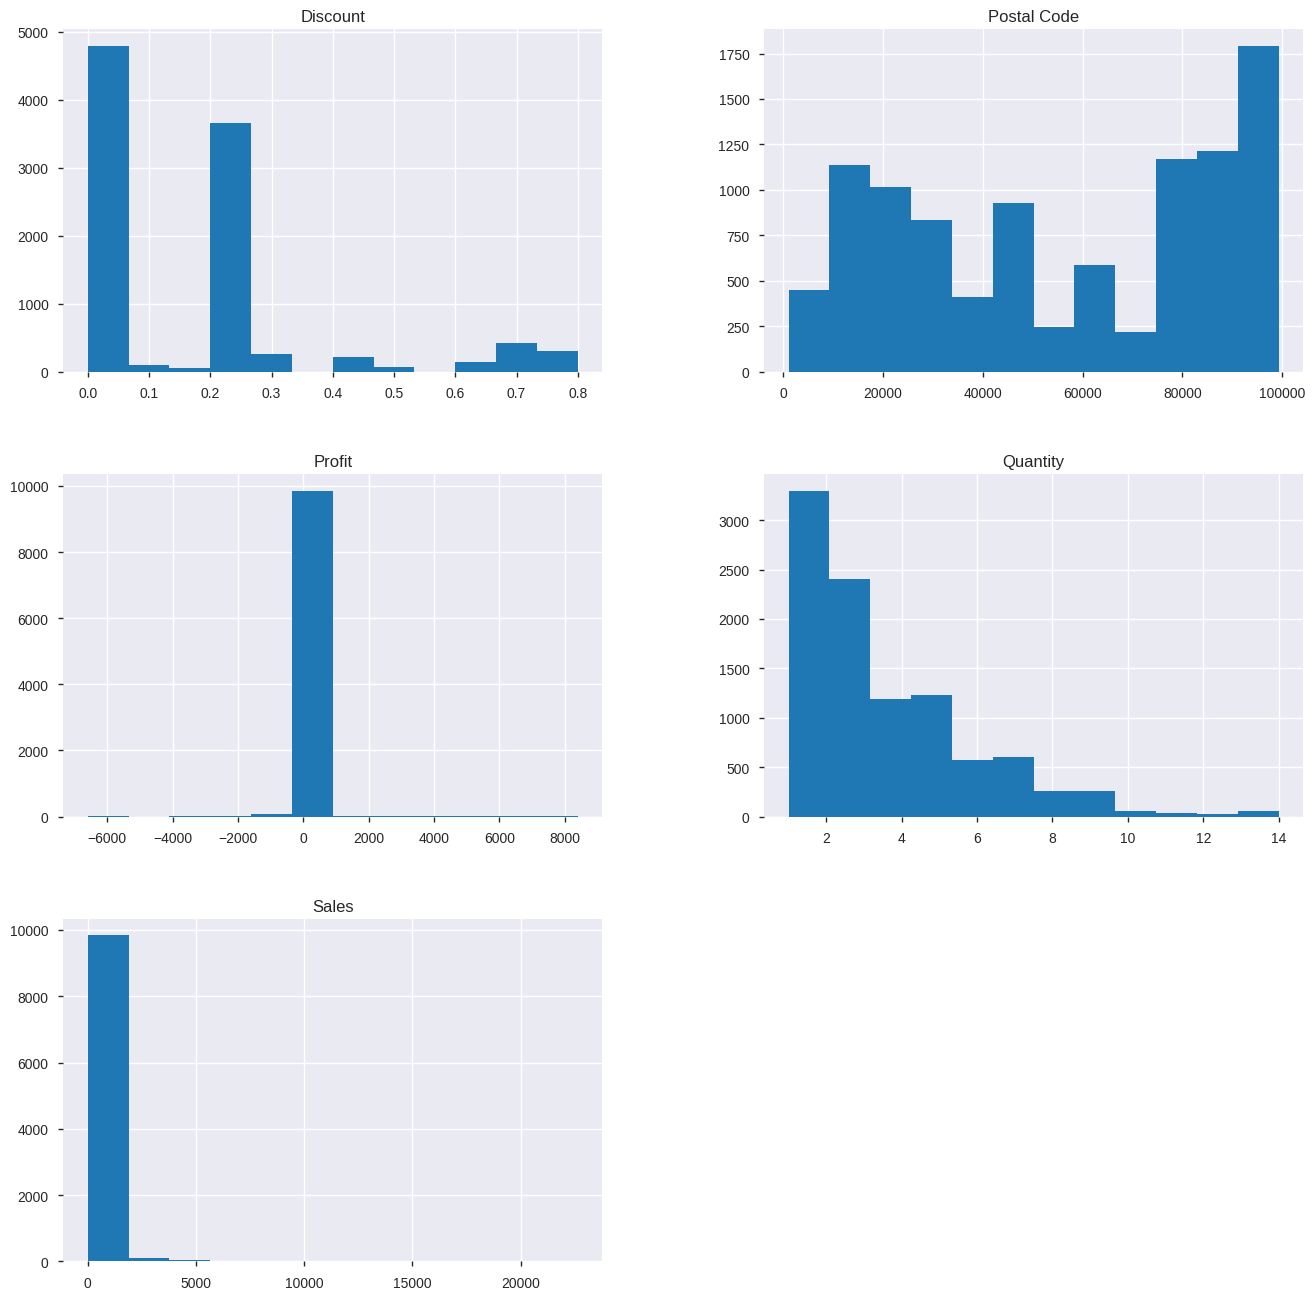

In [38]:
Super_store.hist(figsize=(16,16),bins = 12)